### NYC Restaurants
#### Setup

In [174]:
# import req pandas libraries
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

# read data
df = pd.read_csv('NYC_Restaurants.csv', dtype = str)

Populating the interactive namespace from numpy and matplotlib


#### Question 1: Create a unique name for each restaurant
Converted all to uppercase and added spaces between each field.

In [85]:
df['RESTAURANT'] = (df['DBA'] + ' ' + df['BUILDING'] + ' ' + df['STREET'] + ' ' + df['ZIPCODE'] + ' ' + df['BORO']).str.upper()
df.iloc[:10,-1]

0           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
1           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
2           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
3           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
4           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
5        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
6        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
7        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
8        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
9    BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...
Name: RESTAURANT, dtype: object

#### Question 2
Created a Series of unique values of RESTAURANT, then counted those unique values.

In [170]:
restaurants = df['RESTAURANT'].value_counts()
rest_count = restaurants.count()
print(rest_count)

10114


#### Question 3
Created a Series of restaurants grouped by their DBA, then applied a mask to view only the DBAs with more than one restaurant.

In [171]:
rest_list = df.groupby('DBA').RESTAURANT.nunique()
mask = df.groupby('DBA').RESTAURANT.nunique() > 1
rest_list[mask].count()

386

#### Question 4
Plotted top 20 chains by first sorting by descending values.

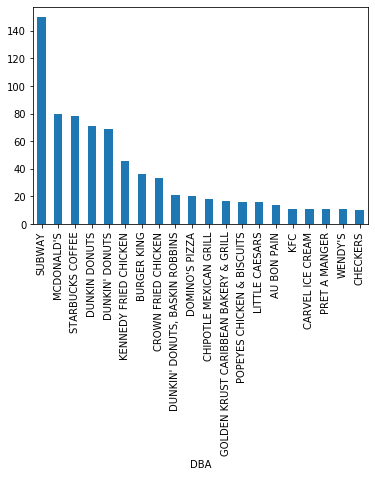

In [173]:
chains = rest_list[mask].sort_values(ascending = False)
chains[:20].plot(kind='bar')

#### Question 5
Created a new field called isChain, then applied a mask to view only restaurants that are chains. 

In [131]:
df['isChain'] = df['DBA'].isin(chains.index)
mask = df['isChain'] == True

chain_restaurants = df['RESTAURANT'][mask].value_counts()

chain_rest_count = chain_restaurants.count()

print(chain_rest_count/rest_count)

0.17134664821040144


#### Question 6
Using the isChain field, grouped restaurants by boro that are not chains. 

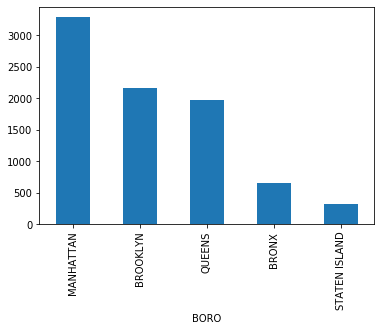

In [153]:
mask = df['isChain'] == False
non_chain_list = df[mask].groupby('BORO').RESTAURANT.nunique().sort_values(ascending = False)[:5]
non_chain_list.plot(kind='bar')

#### Question 7
Using the groups of restaurants that are not chains and the full restauarant list, grouped both lists and plotted the fractions.

The boro with the most independent restaurants (Manhattan) is **NOT** the same as the one with the highest ratio of independent restaurants (Brooklyn).

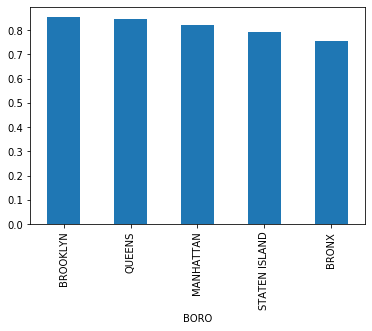

In [165]:
boro_list = df.groupby('BORO').RESTAURANT.nunique().sort_values(ascending = False)[:5]
non_chain_frac = non_chain_list / boro_list
non_chain_frac.sort_values(ascending=False).plot(kind='bar')